In [1]:
#Importacion de librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargamos el csv
data = pd.read_csv('Churn_Clientes.csv')

In [3]:
# Visualiamos el dataframe
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# Vamos a ver la descripcion estadistica de las variables numericas y la informacion del dataframe
print('Información del DataFrame:')
data.info()
print('Descripción estadística de las variables numéricas:')
data.describe()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBillin

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# Verificacion de valores nulos
print('Valores nulos por columna:')
print(data.isnull().sum())


Valores nulos por columna:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
# Convertimos las columnas 'TotalCharges' a tipo float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
# Verificamos nuevamente los valores nulos
print('Valores nulos por columna después de la conversión:')
print(data.isnull().sum())
# Eliminamos las filas con valores nulos en 'TotalCharges'
data = data.dropna(subset=['TotalCharges'])
# Verificamos que ya no haya valores nulos
print('Valores nulos por columna después de eliminar nulos:')
print(data.isnull().sum())


Valores nulos por columna después de la conversión:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
Valores nulos por columna después de eliminar nulos:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Mon

In [7]:
columna_churn = 'Churn'

# 1. Limpieza de Espacios y Conversión a Minúsculas (más seguro)
# Quitamos espacios al inicio/final y convertimos todo a minúsculas
data[columna_churn] = data[columna_churn].astype(str).str.strip().str.lower()

# 2. Diagnóstico: Muestra todos los valores únicos
print("--- Valores Únicos y sus Conteos DESPUÉS de la limpieza: ---")
conteo_valores = data[columna_churn].value_counts(dropna=False)
print(conteo_valores)

# Si tienes muchos valores, muestra solo los únicos
print("\nLista de Valores Únicos:", data[columna_churn].unique())

--- Valores Únicos y sus Conteos DESPUÉS de la limpieza: ---
Churn
no     5163
yes    1869
Name: count, dtype: int64

Lista de Valores Únicos: ['no' 'yes']


C:\Users\DELL\AppData\Local\Temp\ipykernel_3960\4269732495.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columna_churn] = data[columna_churn].astype(str).str.strip().str.lower()


In [8]:
# Reemplaza 'valor_real_si' con la etiqueta exacta que encontraste en el diagnóstico (Paso 1).
# Ejemplo: si el diagnóstico mostró 'si', usa 'si' en lugar de 'yes'.
valor_real_si = 'yes' 

# 1. Aplicación de la Conversión Binaria
# Usamos np.where para convertir el valor real de "sí" a 1, y todo lo demás a 0.
data['Churn_Binario'] = np.where(data[columna_churn] == valor_real_si, 1, 0)

# 2. Verificación Final
print("\n--- Verificación Final de la Columna Binaria ---")
print(data['Churn_Binario'].value_counts())
print("\nVerificación de filas donde debería haber '1' (Clientes que hicieron Churn):")
print(data[[columna_churn, 'Churn_Binario']].loc[data['Churn_Binario'] == 1].head(5))


--- Verificación Final de la Columna Binaria ---
Churn_Binario
0    5163
1    1869
Name: count, dtype: int64

Verificación de filas donde debería haber '1' (Clientes que hicieron Churn):
   Churn  Churn_Binario
2    yes              1
4    yes              1
5    yes              1
8    yes              1
13   yes              1


C:\Users\DELL\AppData\Local\Temp\ipykernel_3960\135256137.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Churn_Binario'] = np.where(data[columna_churn] == valor_real_si, 1, 0)


In [9]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Binario
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,no,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,no,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,no,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,no,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,no,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,no,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,yes,1


C:\Users\DELL\AppData\Local\Temp\ipykernel_3960\139034600.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn_Binario', data=data, palette='Set2')


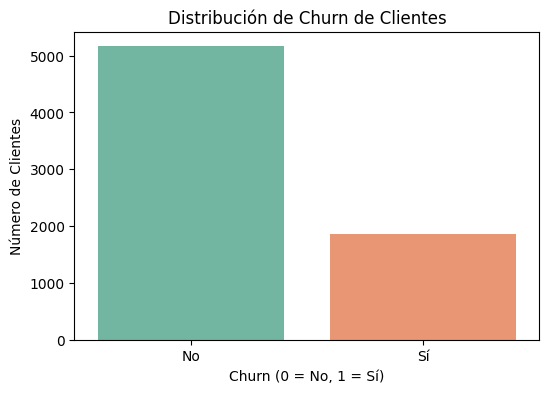

Porcentaje de clientes que hicieron churn: 26.58%


In [10]:
# Graficar la distribución de Churn (gráfico de barras o countplot). Calcular el porcentaje exacto de churn para mostrar el problema de desbalanceo de clases.
plt.figure(figsize=(6,4))
sns.countplot(x='Churn_Binario', data=data, palette='Set2')
plt.title('Distribución de Churn de Clientes')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()
# Calcular el porcentaje de clientes que hicieron churn
total_clientes = len(data)
clientes_churn = data['Churn_Binario'].sum()
porcentaje_churn = (clientes_churn / total_clientes) * 100
print(f'Porcentaje de clientes que hicieron churn: {porcentaje_churn:.2f}%')




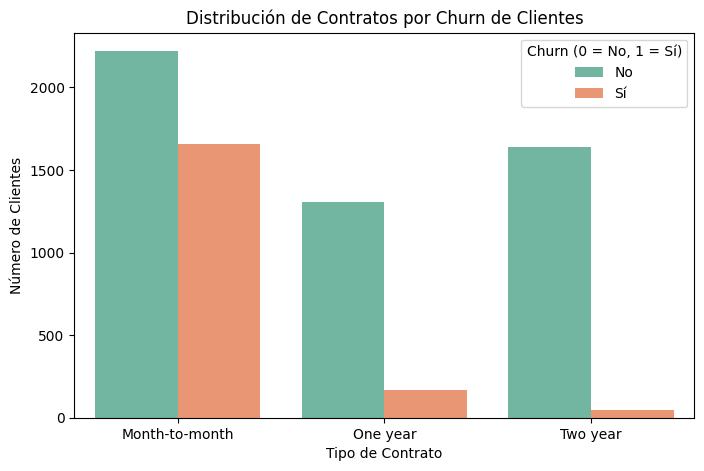

In [11]:
# Grafico de counptplot para la columna 'Contract' con hue en 'Churn_Binario'
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn_Binario', data=data, palette='Set2')
plt.title('Distribución de Contratos por Churn de Clientes')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn (0 = No, 1 = Sí)', labels=['No', 'Sí'])
plt.show()


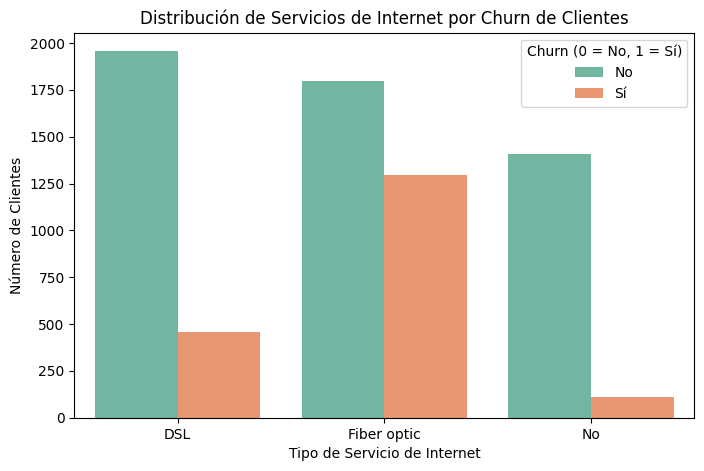

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='InternetService', hue='Churn_Binario', data=data, palette='Set2')
plt.title('Distribución de Servicios de Internet por Churn de Clientes')
plt.xlabel('Tipo de Servicio de Internet')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn (0 = No, 1 = Sí)', labels=['No', 'Sí'])
plt.show()

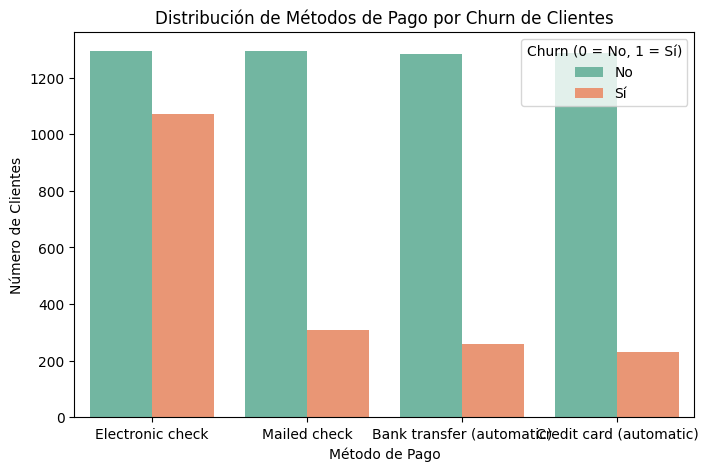

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='PaymentMethod', hue='Churn_Binario', data=data, palette='Set2')
plt.title('Distribución de Métodos de Pago por Churn de Clientes')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn (0 = No, 1 = Sí)', labels=['No', 'Sí'])
plt.show()


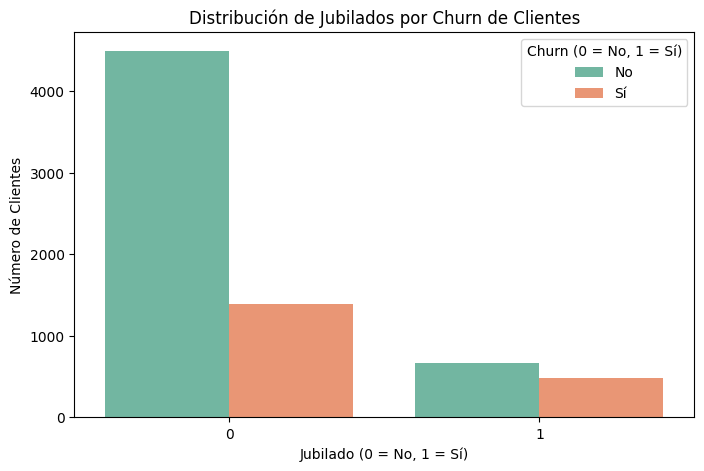

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='SeniorCitizen', hue='Churn_Binario', data=data, palette='Set2')
plt.title('Distribución de Jubilados por Churn de Clientes')
plt.xlabel('Jubilado (0 = No, 1 = Sí)')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn (0 = No, 1 = Sí)', labels=['No', 'Sí'])
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3960\2004038891.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Binario', y='MonthlyCharges', data=data, palette='Set2')


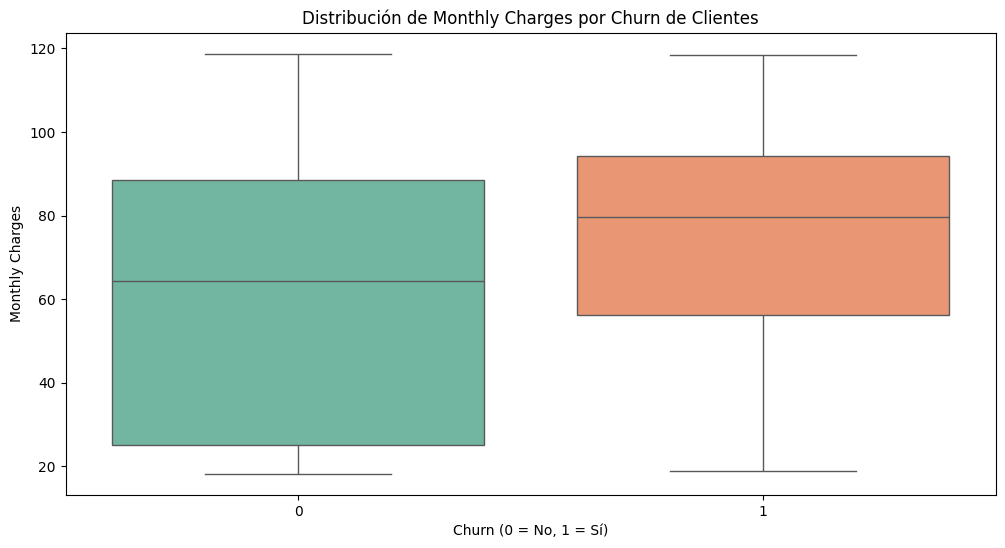

In [15]:
#Grafico de boxplots para la comparacion de las variables numericas con la variable objetivo Churn_Binario
plt.figure(figsize=(12,6))
sns.boxplot(x='Churn_Binario', y='MonthlyCharges', data=data, palette='Set2')
plt.title('Distribución de Monthly Charges por Churn de Clientes')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Monthly Charges')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_3960\680475851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Binario', y='tenure', data=data, palette='Set2')


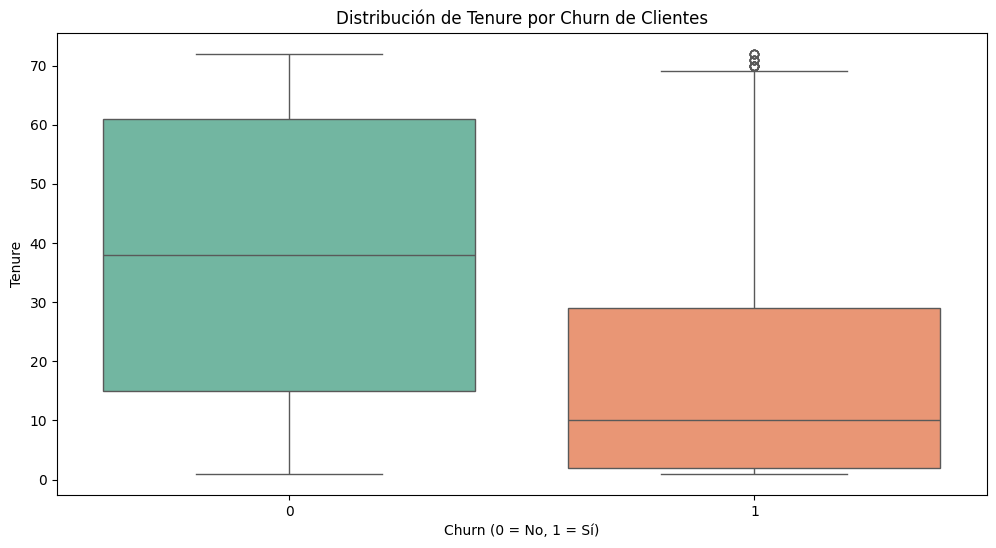

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Churn_Binario', y='tenure', data=data, palette='Set2')
plt.title('Distribución de Tenure por Churn de Clientes')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Tenure')
plt.show()

In [ ]:
# Vamos a crear un ratio de carga mensual por clientes utilizando pandas para ver si es relevante en el analisis de churn
data['MonthlyCharges_per_Tenure'] = data['MonthlyCharges'] / (data['tenure'] + 1)  # +1 para evitar división por cero
data['MonthlyCharges_per_Tenure'] = data['MonthlyCharges_per_Tenure'].round(2)  # Redondear a 2 decimales
data


C:\Users\DELL\AppData\Local\Temp\ipykernel_3960\1624710124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MonthlyCharges_per_Tenure'] = data['MonthlyCharges'] / (data['tenure'] + 1)  # +1 para evitar división por cero
C:\Users\DELL\AppData\Local\Temp\ipykernel_3960\1624710124.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MonthlyCharges_per_Tenure'] = data['MonthlyCharges_per_Tenure'].round(2)  # Redondear a 2 decimales


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Binario,MonthlyCharges_per_Tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,no,0,14.92
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,no,0,1.63
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,yes,1,17.95
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,no,0,0.92
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,yes,1,23.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,no,0,3.39
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,no,0,1.41
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,no,0,2.47
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,yes,1,14.88


In [19]:
# Vamos a realizar una agrupacion de antiguedad de clientes en 5 categorias y ver su relacion con churn
bins = [0, 12, 24, 48, 60, np.inf]
labels = ['0-12 meses', '13-24 meses', '25-48 meses', '49-60 meses', '61+ meses']
data['Tenure_Group'] = pd.cut(data['tenure'], bins=bins, labels=labels, right=False)
data

C:\Users\DELL\AppData\Local\Temp\ipykernel_3960\1453868661.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tenure_Group'] = pd.cut(data['tenure'], bins=bins, labels=labels, right=False)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Binario,MonthlyCharges_per_Tenure,Tenure_Group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,no,0,14.92,0-12 meses
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,no,0,1.63,25-48 meses
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,yes,1,17.95,0-12 meses
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,no,0,0.92,25-48 meses
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,yes,1,23.57,0-12 meses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,One year,Yes,Mailed check,84.80,1990.50,no,0,3.39,25-48 meses
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,no,0,1.41,61+ meses
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,no,0,2.47,0-12 meses
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,yes,1,14.88,0-12 meses


In [20]:
#Creamos una columna con la funcion binaria para saber si el cliente tiene servicios adicionales o no
data['Has_Additional_Services'] = np.where(
    (data['PhoneService'] == 'Yes') | 
    (data['MultipleLines'] == 'Yes') | 
    (data['InternetService'] != 'No') | 
    (data['OnlineSecurity'] == 'Yes') | 
    (data['OnlineBackup'] == 'Yes') | 
    (data['DeviceProtection'] == 'Yes') | 
    (data['TechSupport'] == 'Yes') | 
    (data['StreamingTV'] == 'Yes') | 
    (data['StreamingMovies'] == 'Yes'), 1, 0)
data

C:\Users\DELL\AppData\Local\Temp\ipykernel_3960\1013751934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Has_Additional_Services'] = np.where(


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Binario,MonthlyCharges_per_Tenure,Tenure_Group,Has_Additional_Services
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,no,0,14.92,0-12 meses,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,no,0,1.63,25-48 meses,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,yes,1,17.95,0-12 meses,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,no,0,0.92,25-48 meses,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,yes,1,23.57,0-12 meses,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,One year,Yes,Mailed check,84.80,1990.50,no,0,3.39,25-48 meses,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,One year,Yes,Credit card (automatic),103.20,7362.90,no,0,1.41,61+ meses,1
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,Month-to-month,Yes,Electronic check,29.60,346.45,no,0,2.47,0-12 meses,1
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,Month-to-month,Yes,Mailed check,74.40,306.60,yes,1,14.88,0-12 meses,1


In [22]:
#Vamos a guardar el dataframe modificado en un nuevo csv
data.to_csv('Churn_Clientes_Modificado.csv', index=False)
# --- IGNORE ---
